<a href="https://colab.research.google.com/github/AakashKumar-Code/Alzheimer-s-AI/blob/main/Alzheimer'sAI_Enhancing_Disease_Diagnosis_and_Interpretability%C2%A0with%C2%A0LRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %% Installs
!pip install torch torchvision torchaudio
!pip install matplotlib
!pip install torch
!pip install numpy

In [ ]:
# %% Imports
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import copy
import pandas as pd

In [ ]:
# Set GPU device
print(torch.cuda.is_available())
device = torch.device("cuda:0")

True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from Google Drive
TRAIN_ROOT = "/content/drive/MyDrive/Alzheimer_s/training"
TEST_ROOT = "/content/drive/MyDrive/Alzheimer_s/testing"
train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_ROOT)
test_dataset = torchvision.datasets.ImageFolder(root=TEST_ROOT)

In [ ]:
# %% Building the model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)

        # Replace output layer according to our problem
        in_feats = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(in_feats, 4)

    def forward(self, x):
        x = self.vgg16(x)
        return x

model = CNNModel()
model.to(device)
model

CNNModel(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16):

In [ ]:
# %% Prepare data for pretrained model
train_dataset = torchvision.datasets.ImageFolder(
        root=TRAIN_ROOT,
        transform=transforms.Compose([
                      transforms.Resize((255,255)),
                      transforms.ToTensor()
        ])
)

test_dataset = torchvision.datasets.ImageFolder(
        root=TEST_ROOT,
        transform=transforms.Compose([
                      transforms.Resize((255,255)),
                      transforms.ToTensor()
        ])
)

#train_dataset[0][0].permute(1,2,0)

In [ ]:
# %% Create data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
# %% Train
cross_entropy_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
epochs = 10

In [ ]:
# Iterate x epochs over the train data
for epoch in range(epochs):
    for i, batch in enumerate(train_loader, 0):
        inputs, labels = batch
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = cross_entropy_loss(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss)

tensor(1.7289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6213, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4652, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4735, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3798, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2948, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2989, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2539, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1931, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2643, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0913, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0493, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1533, device='cuda:0', grad_fn=

In [ ]:
# %% Inspect predictions for first batch
import pandas as pd
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
labels = labels.numpy()
outputs = model(inputs).max(1).indices.detach().cpu().numpy()
comparison = pd.DataFrame()
print("Batch accuracy: ", (labels==outputs).sum()/len(labels))
comparison["labels"] = labels

comparison["outputs"] = outputs
comparison

Batch accuracy:  0.84375


,labels,outputs
0,3,3
1,2,2
2,3,3
3,3,3
4,2,2
5,2,2
6,2,2
7,0,3
8,3,3
9,3,3


In [ ]:
# %% Layerwise relevance propagation for VGG16

def new_layer(layer, g):
    """Clone a layer and pass its parameters through the function g."""
    layer = copy.deepcopy(layer)
    try: layer.weight = torch.nn.Parameter(g(layer.weight))
    except AttributeError: pass
    try: layer.bias = torch.nn.Parameter(g(layer.bias))
    except AttributeError: pass
    return layer

def dense_to_conv(layers):
    """ Converts a dense layer to a conv layer """
    newlayers = []
    for i,layer in enumerate(layers):
        if isinstance(layer, nn.Linear):
            newlayer = None
            if i == 0:
                m, n = 512, layer.weight.shape[0]
                newlayer = nn.Conv2d(m,n,7)
                newlayer.weight = nn.Parameter(layer.weight.reshape(n,m,7,7))
            else:
                m,n = layer.weight.shape[1],layer.weight.shape[0]
                newlayer = nn.Conv2d(m,n,1)
                newlayer.weight = nn.Parameter(layer.weight.reshape(n,m,1,1))
            newlayer.bias = nn.Parameter(layer.bias)
            newlayers += [newlayer]
        else:
            newlayers += [layer]
    return newlayers

def get_linear_layer_indices(model):
    offset = len(model.vgg16._modules['features']) + 1
    indices = []
    for i, layer in enumerate(model.vgg16._modules['classifier']):
        if isinstance(layer, nn.Linear):
            indices.append(i)
    indices = [offset + val for val in indices]
    return indices

def apply_lrp_on_vgg16(model, image):
    image = torch.unsqueeze(image, 0)
    # >>> Step 1: Extract layers
    layers = list(model.vgg16._modules['features']) \
                + [model.vgg16._modules['avgpool']] \
                + dense_to_conv(list(model.vgg16._modules['classifier']))
    linear_layer_indices = get_linear_layer_indices(model)
    # >>> Step 2: Propagate image through layers and store activations
    n_layers = len(layers)
    activations = [image] + [None] * n_layers # list of activations

    for layer in range(n_layers):
        if layer in linear_layer_indices:
            if layer == 32:
                activations[layer] = activations[layer].reshape((1, 512, 7, 7))
        activation = layers[layer].forward(activations[layer])
        if isinstance(layers[layer], torch.nn.modules.pooling.AdaptiveAvgPool2d):
            activation = torch.flatten(activation, start_dim=1)
        activations[layer+1] = activation

    # >>> Step 3: Replace last layer with one-hot-encoding
    output_activation = activations[-1].detach().cpu().numpy()
    max_activation = output_activation.max()
    one_hot_output = [val if val == max_activation else 0
                        for val in output_activation[0]]

    activations[-1] = torch.FloatTensor([one_hot_output]).to(device)

    # >>> Step 4: Backpropagate relevance scores
    relevances = [None] * n_layers + [activations[-1]]
    # Iterate over the layers in reverse order
    for layer in range(0, n_layers)[::-1]:
        current = layers[layer]
        # Treat max pooling layers as avg pooling
        if isinstance(current, torch.nn.MaxPool2d):
            layers[layer] = torch.nn.AvgPool2d(2)
            current = layers[layer]
        if isinstance(current, torch.nn.Conv2d) or \
           isinstance(current, torch.nn.AvgPool2d) or\
           isinstance(current, torch.nn.Linear):
            activations[layer] = activations[layer].data.requires_grad_(True)


            # Lower layers, LRP-gamma >> Favor positive contributions (activations)
            if layer <= 16:       rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9
            # Middle layers, LRP-epsilon >> Remove some noise / Only most salient factors survive
            if 17 <= layer <= 30: rho = lambda p: p;                       incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
            # Upper Layers, LRP-0 >> Basic rule
            if layer >= 31:       rho = lambda p: p;                       incr = lambda z: z+1e-9

            # Transform weights of layer and execute forward pass
            z = incr(new_layer(layers[layer],rho).forward(activations[layer]))
            # Element-wise division between relevance of the next layer and z
            s = (relevances[layer+1]/z).data
            # Calculate the gradient and multiply it by the activation
            (z * s).sum().backward();
            c = activations[layer].grad
            # Assign new relevance values
            relevances[layer] = (activations[layer]*c).data
        else:
            relevances[layer] = relevances[layer+1]

    # >>> Potential Step 5: Apply different propagation rule for pixels
    return relevances[0]

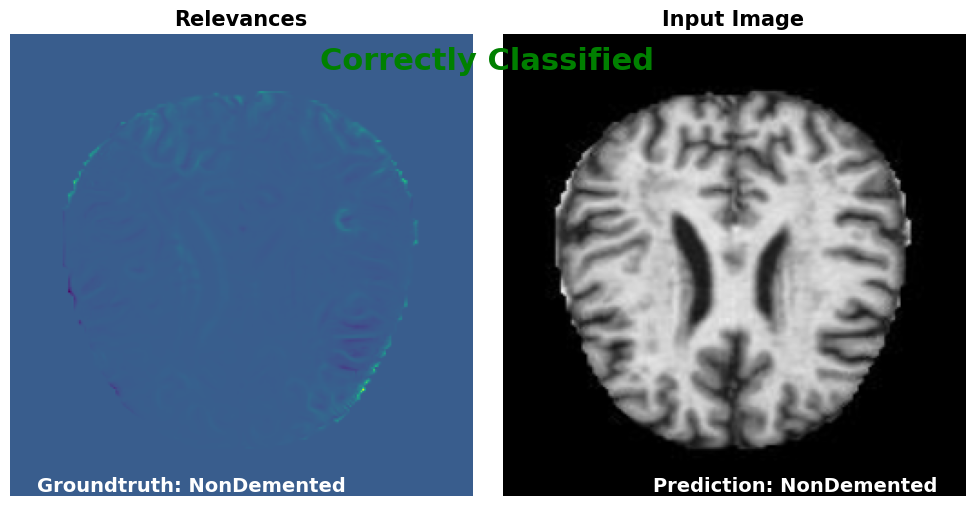

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate relevances for the image with the specified image_id
image_id = 1
image_relevances = apply_lrp_on_vgg16(model, inputs[image_id])
image_relevances = image_relevances.permute(0, 2, 3, 1).detach().cpu().numpy()[0]
image_relevances = np.interp(image_relevances, (image_relevances.min(), image_relevances.max()), (0, 1))

# Get the predicted and ground truth labels
pred_label = list(test_dataset.class_to_idx.keys())[list(test_dataset.class_to_idx.values()).index(labels[image_id])]

# Check if the image is classified correctly
is_correct = (outputs[image_id] == labels[image_id])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.ravel()

# Plot image relevances with a darker blue colormap
axes[0].imshow(image_relevances[:, :, 0], cmap="viridis", alpha=0.99)  # Adjust alpha to control intensity
axes[0].set_title("Relevances", fontsize=15, fontweight='bold')
axes[0].axis('off')

# Plot the input image
axes[1].imshow(inputs[image_id].permute(1, 2, 0).detach().cpu().numpy())
axes[1].set_title("Input Image", fontsize=15, fontweight='bold')
axes[1].axis('off')

# Display ground truth and prediction labels
plt.figtext(0.05, 0.05, "Groundtruth: " + pred_label, fontsize=14, fontweight='bold', va="center", ha="left", color='white')
plt.figtext(0.95, 0.05, "Prediction: " + list(test_dataset.class_to_idx.keys())[outputs[image_id]], fontsize=14, fontweight='bold', va="center", ha="right", color='white')

# Display classification result
if is_correct:
    plt.figtext(0.5, 0.9, "Correctly Classified", fontsize=22, fontweight='bold', va="center", ha="center", color='green')
else:
    plt.figtext(0.5, 0.9, "Misclassified", fontsize=22, fontweight='bold', va="center", ha="center", color='red')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns


# Initialize lists to store predictions and ground truth labels
all_predictions = []
all_labels = []

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        predictions = outputs.max(1).indices.detach().cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Create and plot the confusion matrix with improved aesthetics
conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_dataset.classes, yticklabels=test_dataset.classes,
            cbar_kws={'label': 'Count'}, linewidths=.5)

plt.title("Confusion Matrix", fontweight='bold', fontsize=16)
plt.xlabel("Predicted Label", fontweight='bold', fontsize=14)
plt.ylabel("True Label", fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

